In [1]:
import arviz as az 
import pymc as pm
from utils import (models_training_data, metricas, curvas_metricas)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
"""
No modificar
Todos los path que se van a utilizar"""
"""-----------------------------------------------------------------------------"""
path_bayesian_w_factors = 'modelos/trace_bayesian.pkl'
path_simple_bayesian = 'modelos/trace_cov.pkl'
path_nn = 'modelos/trace_nn.pkl'

path_slope_PP_vhs1_factor09 = 'data/processed/X_slope_PP_vhs1_factor09.csv'
path_slope_PP_vhs1_factor08 = 'data/processed/X_slope_PP_vhs1_factor08.csv'
"""-----------------------------------------------------------------------------"""

"""
Modificar argumento de models_training_data() en caso de querer usar el otro factor indicado arriba
Se podrían estanciar nuevas clases del model_training_data y seguir los mimos pasos de más abajo
si se desea utilizar los dos factores al mismo tiempo o usar un nuevo dataframe en /data/processed/ o
usar los datos raw en /data/raw/
"""
models_training_data_ = models_training_data(path_slope_PP_vhs1_factor09)
X_train = models_training_data_.X_train
X_test = models_training_data_.X_test
y_train = models_training_data_.y_train
y_test = models_training_data_.y_test

In [3]:
"""
No modificar
Se llaman los modelos con el método de la clase
"""
neural_network_ = models_training_data_.construct_nn(X_train, y_train)
bayesian_model_w_factors_ = models_training_data_.bayesian_model_w_factors(X_train, y_train)
simple_bayesian_model_ = models_training_data_.simple_bayesian_model(X_train, y_train)

In [4]:
"""
No modificar
Se llaman los trace de los modelos que ya estan entrenados
"""
trace_model = models_training_data_.read_model(path_simple_bayesian)
trace_nn = models_training_data_.read_model(path_nn)
trace_w_factors = models_training_data_.read_model(path_bayesian_w_factors)

Sampling: []


Accuracy = 83.92857142857143%
RECALL: 0.911
PRECISION: 0.797


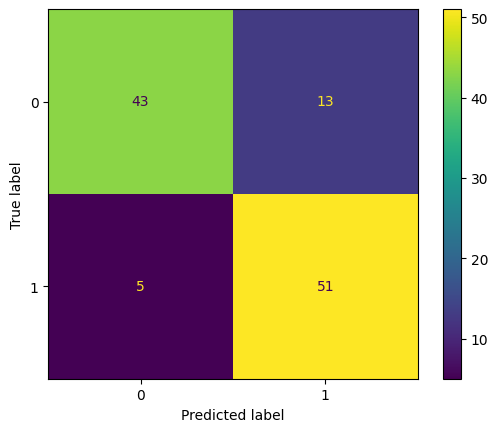

Sampling: [out]


Accuracy = 84.82142857142857%
RECALL: 0.911
PRECISION: 0.810


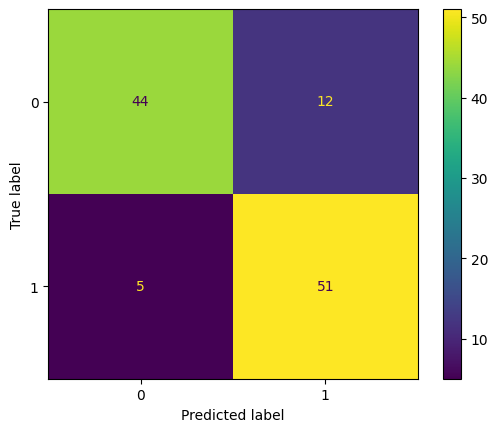

Sampling: []


Accuracy = 83.92857142857143%
RECALL: 0.893
PRECISION: 0.806


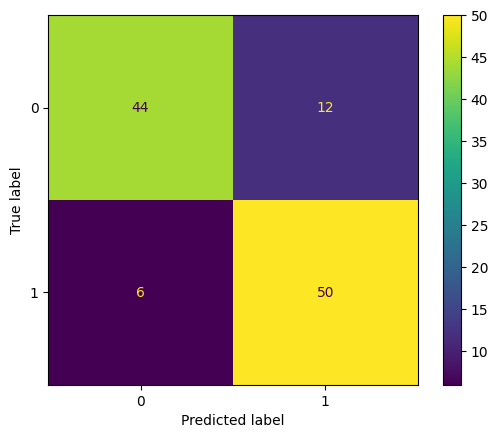

'\nTN FP\nFN TP\n'

In [5]:
"""
Se realiza la inferencia son el modelo simple, con factores de grado mayor y con la red neuronal bayesiana
y se imprime su acc, recall, precision junto a su matriz de confusión
"""

y_score_simple_model, trace_simple_model = models_training_data_.model_inference(simple_bayesian_model_, trace_model)
metricas(y_test, y_score_simple_model)

y_score_nn, trace_model_nn = models_training_data_.nn_model_inference(neural_network_, trace_nn)
metricas(y_test, y_score_nn)

y_score_w_factors, trace_w_factors = models_training_data_.model_inference(bayesian_model_w_factors_, trace_w_factors)
metricas(y_test, y_score_w_factors)
"""
TN FP
FN TP
"""

In [17]:
"""
Si se quiere entrenar un modelo, por ejemplo ahora con datos nuevos se usa lo siguiente:

    trace_nn = models_training_data_.train_nn_model(neural_network_)
    trace_bayesian = models_training_data_.train_model(bayesian_regression_tree_)
    trace_cov = models_training_data_.train_model(modelo_formula_cov_)

Luego se obtiene el trace con el cual se puede realizar la inferencia llamando al modelo junto a su trace:

    y_score_simple_model, trace_simple_model = models_training_data_.model_inference(simple_bayesian_model_, trace_model)
    y_score_nn, trace_model_nn = models_training_data_.nn_model_inference(neural_network_, trace_nn)

donde se obtiene el Y predicho junto al trace posterior (el cual cambia)
"""

'\nSi se quiere entrenar un modelo, por ejemplo ahora con datos nuevos se usa lo siguiente:\n\n    trace_nn = models_training_data_.train_nn_model(neural_network_)\n    trace_bayesian = models_training_data_.train_model(bayesian_regression_tree_)\n    trace_cov = models_training_data_.train_model(modelo_formula_cov_)\n\nLuego se obtiene el trace con el cual se puede realizar la inferencia llamando al modelo junto a su trace:\n\n    y_score_simple_model, trace_simple_model = models_training_data_.model_inference(simple_bayesian_model_, trace_model)\n    y_score_nn, trace_model_nn = models_training_data_.nn_model_inference(neural_network_, trace_nn)\n\ndonde se obtiene el Y predicho junto al trace posterior (el cual cambia)\n'

In [ ]:
"""
Para entrenar y guardar el modelo automáticamente se usa el siguiente método
donde se entrega primero el modelo y luego el nombre con el que se quiere guardar el trace post entrenamiento

    save_model(bayesian_regression_tree_, 'trace_bayesian')
    save_model(modelo_formula_cov_, 'trace_cov')
    save_model_nn(neural_network_, 'trace_nn')

En caso de querer guardar un trace que se entrenó dentro del notebook se hace manual:

            with open(f'{name_trace}.pkl', 'wb') as f:
                pickle.dump(trace, f)
"""

"save_model(bayesian_regression_tree_, 'bayesian_regression_tree', 'trace_bayesian')\nsave_model(modelo_formula_cov_, 'modelo_formula_cov', 'trace_cov')\nsave_model_nn(neural_network_, 'neural_network', 'trace_nn')"

# Gráficos
Lo siguiente sólo son imágenes para analizar los modelos a partir de sus métricas

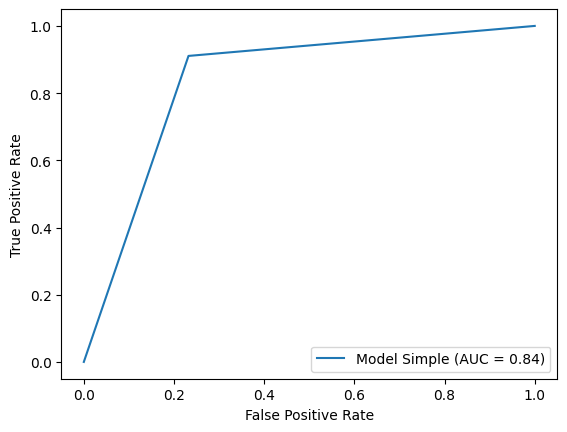

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score_simple_model)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Model Simple')
display.plot()
plt.show()

In [13]:
def metricas_nb(y_test, y_score):
    acc = accuracy_score(y_test, y_score)
    precision = precision_score(y_test, y_score)
    recall = recall_score(y_test, y_score)
    return acc, precision, recall

In [14]:
acc_simple, precision_simple, recall_simple = metricas_nb(y_test, y_score_simple_model)
acc_nn, precision_nn, recall_nn = metricas_nb(y_test, y_score_nn)
acc_w_factors, precision_w_factos, recall_w_factors = metricas_nb(y_test, y_score_w_factors)

resultados_simple = [acc_simple, precision_simple, recall_simple]
resultados_nn = [acc_nn, precision_nn, recall_nn]
resultados_w_factors = [acc_w_factors, precision_w_factos, recall_w_factors]

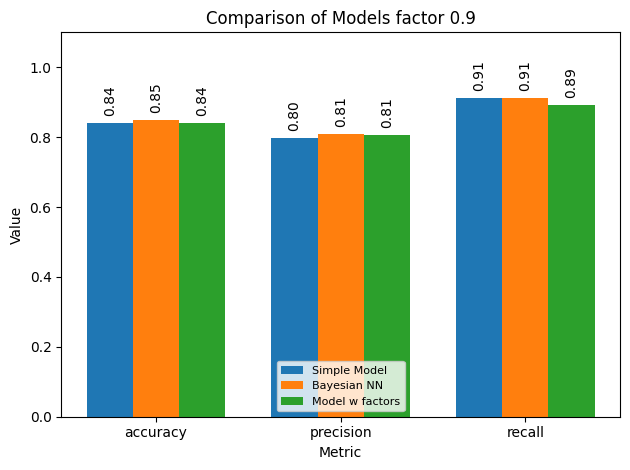

In [16]:
ancho_barra = 0.25
metricas = ['accuracy', 'precision', 'recall']
metodos = ['simple_bayesian_model', 'bayesian nn', 'bayesian_model_w_factors']
indices = range(len(metricas))

plt.bar(indices, resultados_simple, width=ancho_barra, label='Simple Model',
    align='center')
plt.bar([i + ancho_barra for i in indices], resultados_nn, width=ancho_barra,
    label='Bayesian NN', align='center')
plt.bar([i + 2 * ancho_barra for i in indices], resultados_w_factors,
    width=ancho_barra, label='Model w factors', align='center')
# Configurar etiquetas y título
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Comparison of Models factor 0.9')
plt.xticks([i + ancho_barra for i in indices], metricas)
# Ajustar el eje y para tener un rango específico (por ejemplo, de 0 a 1)
plt.ylim(0, 1.1)
# Agregar etiquetas numéricas en la parte superior de cada barra
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3), # Ajustar el espaciado vertical aquí
            textcoords="offset points",
            ha='center', va='bottom', rotation=90) # Rotar las etiquetas 90 grados
# Agregar etiquetas numéricas en la parte superior de cada barra
for i in indices:
    plt.text(i, resultados_simple[i] + 0.02, f'{resultados_simple[i]:.2f}', ha='center',
        va='bottom', fontsize=10, rotation= 90)
    plt.text(i + ancho_barra, resultados_nn[i] + 0.02,
    f'{resultados_nn[i]:.2f}', ha='center', va='bottom', fontsize=10, rotation=
    90)
    plt.text(i + 2 * ancho_barra, resultados_w_factors[i] + 0.02,
    f'{resultados_w_factors[i]:.2f}', ha='center', va='bottom', fontsize=10, rotation=
    90)
    # Colocar la leyenda al costado derecho, fuera del gráfico de barras y ajustar el tamaño de fuente
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0), fontsize=8)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [14]:
class_labels = ['Si', 'No']

In [15]:
def plot_confusion_matrix(conf_matrix, title, fontsize=12, title_fontsize=8):
    plt.figure(figsize=(4, 2))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=8)
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45, fontsize=8)
    plt.yticks(tick_marks, class_labels, fontsize=8)
    plt.ylabel('Predicted', fontsize=fontsize)
    plt.xlabel('Actual', fontsize=fontsize)
    plt.tight_layout()
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center',
                     color='red')
    plt.tight_layout()

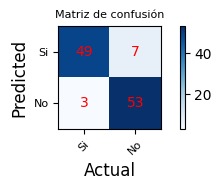

In [16]:
cm = metrics.confusion_matrix(y_test, y_score_simple_model)
plot_confusion_matrix(cm, 'Matriz de confusión')

Precision:  0.7105263157894737
Recall:  0.75


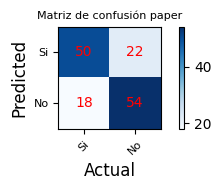

In [38]:
plot_confusion_matrix(cm_paper, 'Matriz de confusión paper')
print('Precision: ', 54/(54+22))
print('Recall: ', 54/(54+18))

In [36]:
cm_paper = np.array([[50, 22], [18, 54]])
cm_paper

array([[50, 22],
       [18, 54]])

In [10]:
print(f'Conjunto de entrenamiento: {X_train.shape}\nConjunto de test; {X_test.shape}')

Conjunto de entrenamiento: (446, 3)
Conjunto de test; (112, 3)


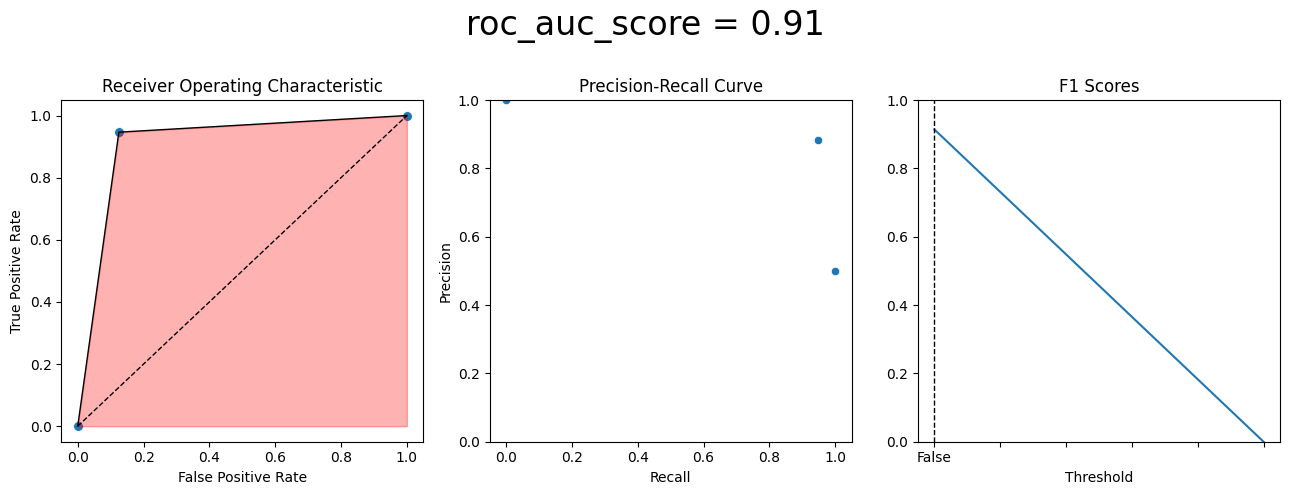

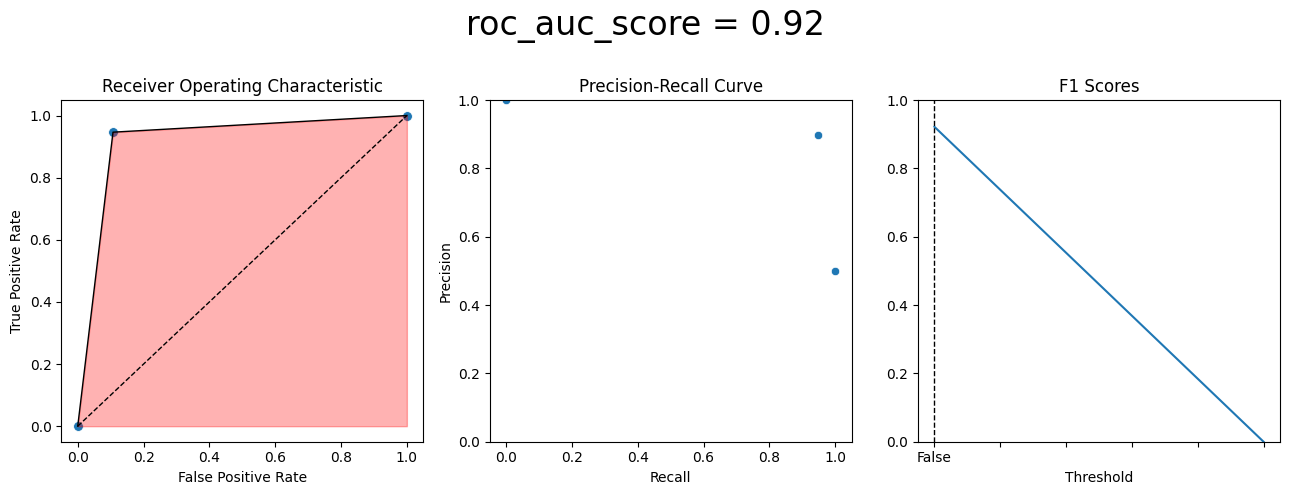

In [11]:
curvas_metricas(y_test, y_score_simple_model)
curvas_metricas(y_test, y_score_nn)

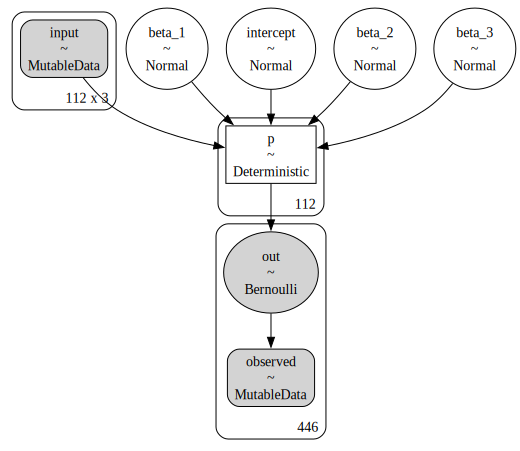

In [12]:
pm.model_to_graphviz(simple_bayesian_model_)

In [13]:
pm.summary(trace_simple, var_names=['intercept', 'beta_1', 'beta_2', 'beta_3'], kind= 'stats')

NameError: name 'trace_simple' is not defined

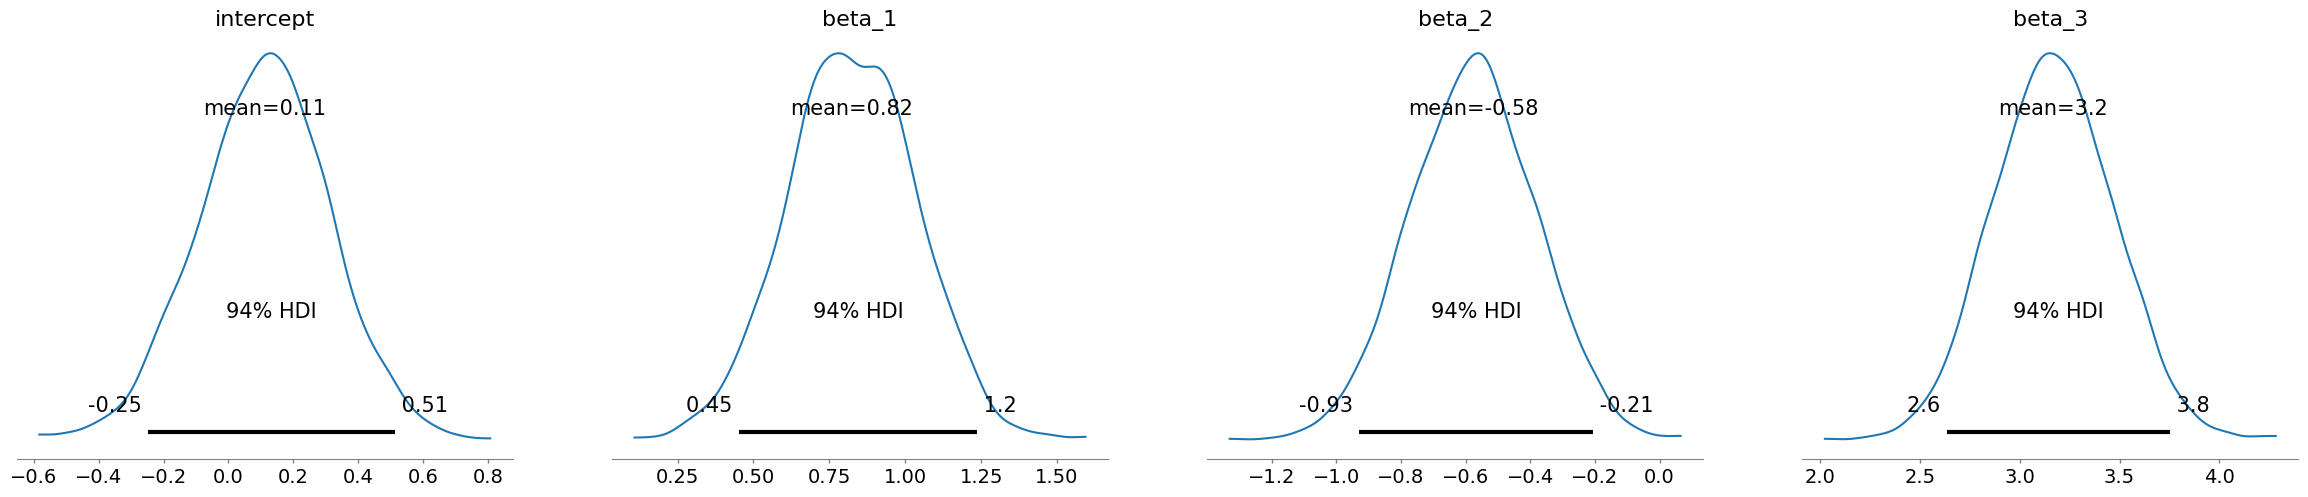

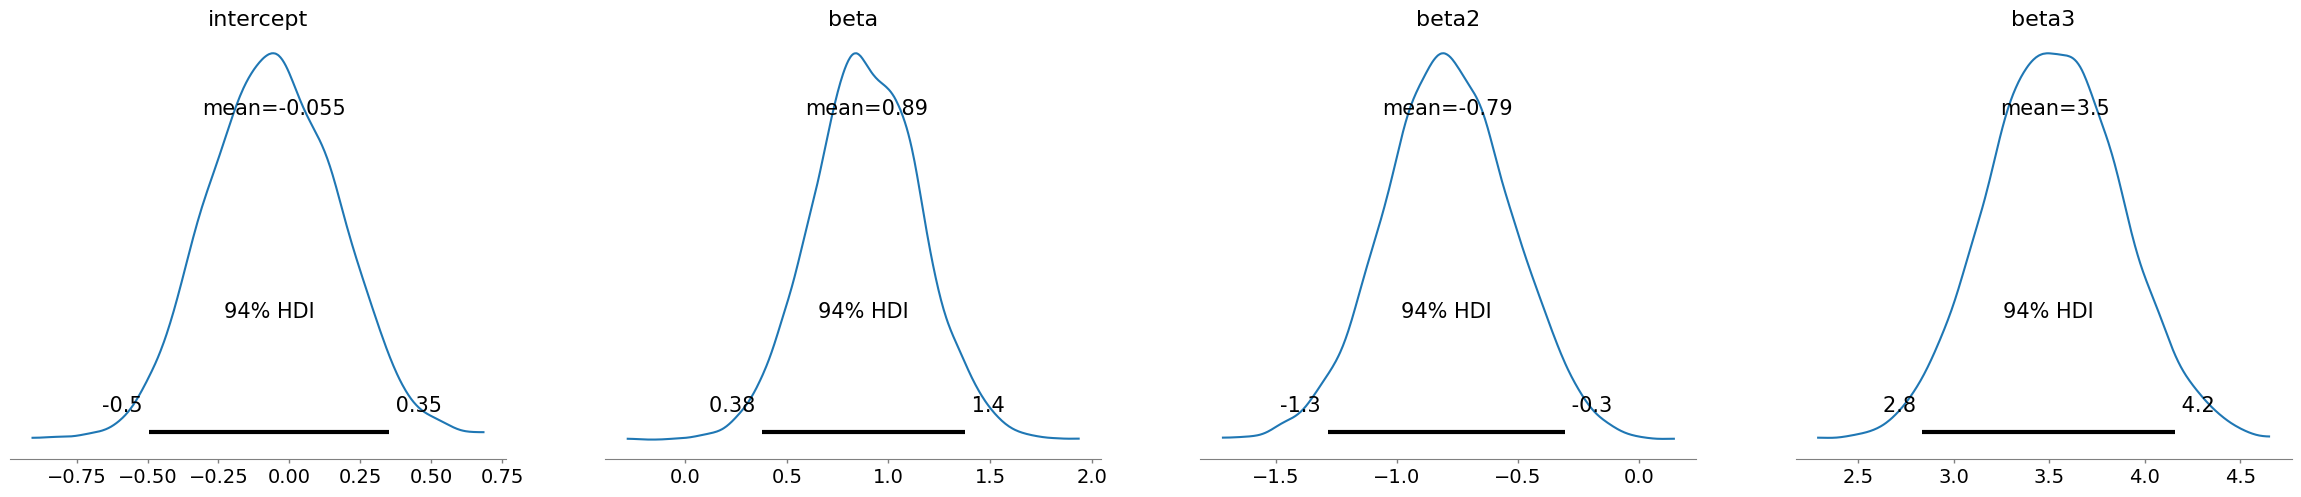

In [34]:
az.plot_posterior(trace_model, var_names=['intercept', 'beta_1', 'beta_2', 'beta_3']);
az.plot_posterior(trace_w_factors, var_names=['intercept', 'beta', 'beta2', 'beta3']);